 # Интегрирование задачи трех тел

## Начальные данные:
$$
x_1 = -x_{10}  \qquad   x_2 = 0 \qquad   x_3 = x_{10}
$$

$$
y_1 = 0 \qquad y_2 = 0 \qquad y_3 = 0  
$$

$$
\dot{x_1} = -\frac{1}{2}\dot{x_2} \qquad \dot{x_2} = 0.749442191077792\qquad \dot{x_3} = -\frac{1}{2}\dot{x_2}
$$

$$
\dot{y_1} = -\frac{1}{2}\dot{y_2} \qquad \dot{y_2} = 1.1501789857502275 \qquad \dot{y_3} = -\frac{1}{2}\dot{y_2}
$$

$$
m_1 + m_2 + m_3 = 1 
$$

$$
h = -\frac{1}{2} \qquad G = 1
$$

## Уравнения:

* $\textbf{Найдем $x_{10}$ из интеграла энергий}$

$$
T - U = h
$$
    где
$$
T = \sum_{i=1}^3 \frac{m_i \dot{x_i}^2}{2} \qquad U = \sum_{i=1}^3\sum_{k=1}^{3} \frac{G m_i m_k}{r_{ik}} \quad (i > k) \qquad r_{ik} = \sqrt{(x_k - x_i)^2 + (y_k - y_i)^2}
$$

Подставляя данные задачи, получаем:

$$
x_{10} = \frac{5}{18(T-h)}
$$

* $\textbf{Уравнение движения:}$

$m_i\ddot{\vec{r_i}} = grad_i(U) \qquad i = 1, 2, 3 $, где $\vec{r_i} = (x_i, y_i)$

Сделаем замену переменных:

$ \dot{x_i} = \frac{p_i}{m_i}$

$\dot{y_i} = \frac{v_i}{m_i}$

Получим систему для i=1,2,3 (12 уравнений):

$$\dot{x_i} = \frac{p_i}{m_i}$$

$$\dot{y_i} = \frac{v_i}{m_i}$$

$$\dot{p_i} = \Big( grad_i(U) \Big)_x $$

$$\dot{v_i} = \Big( grad_i(U) \Big)_y $$

Иначе  $\dot{\vec{y}} = \vec{f}(t, \vec{y})$, где $\vec{y} = (x1, p1, x2, p2, x3, p3, y1, v1, y2, v2, y3, v3)$

Напишем функцию, имитирующую полученную систему. Её мы будем давать на вход интегратору в качестве аргумента.

In [1]:
def system(t, state):

    # (x, p) and (y, v) are the  generalized coordinates
    # p_i = m_i * x_i
    # v_i = m_i * y_i
    # m1 + m2 + m3 = 1
    # G = 1

    x1, p1, x2, p2, x3, p3, y1, v1, y2, v2, y3 ,v3   = state
    
    r12 = np.sqrt((x2-x1)**2 + (y2-y1)**2)
    r13 = np.sqrt((x3-x1)**2 + (y3-y1)**2)
    r23 = np.sqrt((x3-x2)**2 + (y3-y2)**2)

    u_x1 = -(x1 - x2)/(9 * r12**3) - (x1 - x3)/(9 * r13**3)
    u_x2 =  (x1 - x2)/(9 * r12**3) - (x2 - x3)/(9 * r23**3)
    u_x3 =  (x1 - x3)/(9 * r13**3) + (x2 - x3)/(9 * r23**3)

    u_y1 = -(y1 - y2)/(9 * r12**3) - (y1 - y3)/(9 * r13**3)
    u_y2 =  (y1 - y2)/(9 * r12**3) - (y2 - y3)/(9 * r23**3)
    u_y3 =  (y1 - y3)/(9 * r13**3) + (y2 - y3)/(9 * r23**3)

    dx1 = 3 * p1
    dp1 = u_x1

    dx2 = 3 * p2
    dp2 = u_x2

    dx3 = 3 * p3
    dp3 = u_x3

    dy1 = 3 * v1
    dv1 = u_y1

    dy2 = 3 * v2
    dv2 = u_y2

    dy3 = 3 * v3
    dv3 = u_y3

    return [dx1, dp1, dx2, dp2, dx3, dp3, dy1, dv1, dy2, dv2, dy3 ,dv3]

Инициализируем начальные данные задачи

In [2]:
# T - U = h => U = T - h =  (1/x10 + 1/2/x10 + 1/x10)/9 = 5/18/x10
# x10 = 5/18/(T-h)

h   = -0.5
dx2 =  0.749442191077792
dy2 =  1.1501789857502275
dx1 = -0.5*dx2
dy1 = -0.5*dy2
dx3 = -0.5*dx2
dy3 = -0.5*dy2
x2  =  0
y2  =  0
y3  =  0
y1  =  0

T = (dx1**2 + dx2**2 + dx3**2 + dy1**2 + dy2**2 + dy3**2)/6 
x10 = 5/18/(T-h)
x1 = -x10
x3 =  x10

p1 = dx1/3; p2 = dx2/3; p3 = dx3/3
v1 = dy1/3; v2 = dy2/3; v3 = dy3/3

z0 = [x1, p1, x2, p2, x3, p3, y1, v1, y2, v2, y3 ,v3]

Для решения задачи я использовал интегратор Radau, использующий неявный метод Рунге-Кутты. Больше информации по ссылке: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp




### Параметры:

$\textbf{funс:}$        Система дифференциальных уравнений первого порядка

$\textbf{t_span:}$     Интервал интегрирования

$\textbf{t_eval:}$     Сетка интегрирования

$\textbf{y0:}$         Вектор начальных данных

$\textbf{method:}$     Метод интегрирования

$\textbf{rtol:}$       Относительная погрешность решения уравнения


In [3]:
import numpy as np
from scipy.integrate import solve_ivp

tm = 1000
t = np.arange(0, tm, 0.001)
result = solve_ivp(fun=system, t_span=[0,tm], y0=z0, t_eval=t, method='Radau',rtol=1e-6)
print('status=', result.status)
result = result.y


status= 0


Выпишем все решения для неизвестных функций:

In [4]:
p1 = result[1 , :]
p2 = result[3 , :]
p3 = result[5 , :]
v1 = result[7 , :]
v2 = result[9 , :]
v3 = result[11, :]
x1 = result[0, :]
x2 = result[2 , :]
x3 = result[4, :]
y1 = result[6 , :]
y2 = result[8, :]
y3 = result[10 , :]

Построим получившуюся обиту для одного из тел:

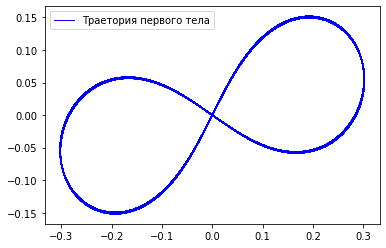

In [5]:
import matplotlib.pyplot as plt

plt.plot(x1, y1, '-b', label='Траетория первого тела', lw=1)
plt.legend()
plt.show()

Как видим, орбита получилась замкнутой, следовательно решение периодично. Найдем его период. Для этого построим Фурье спектр величины $\vec{r}^{\circ} = \vec{r} - \bar{\vec{r}}$, то есть центрированного радиус-вектора одной из точек и найдем частоту его максимума. 

nu_max= 1.1935 +- 0.0005


(0.0, 2.0)

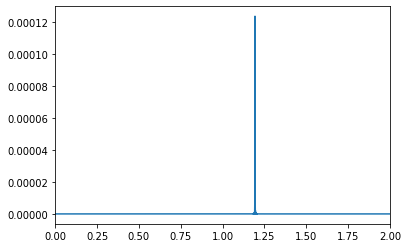

In [6]:
from scipy.fft import fft

r = x2**2+y2**2
r0 = r - np.mean(r)

# дополняем нулями
p = int(2+ np.log2(len(r0)))
l = np.zeros(2**p-len(r0))
r0 = np.hstack((r0, l))

# преобразование Фурье
fr0 = fft(r0)

# Спектр мощности
pr0 = ((fr0.real**2 + fr0.imag**2)/(len(r0)**2))[0:2**(p-1)]

nu = np.arange(0, 1/(2*t[1]), 1/(2**p*t[1]))
numax = float(nu[pr0 == np.max(pr0)])
print('nu_max=', round(numax,4), '+-', round(nu[1],4))
plt.plot(nu, pr0)
plt.xlim(0, 2)

Найденная частота соответсвует половине периода в силу симметрии задачи. Таким образом период системы:

In [7]:
Period = round(2/numax,3)
print('T =', Period, '+-', round(2*nu[1]/numax**2,3))

T = 1.676 +- 0.001


В качестве проверки точности интегратора, посмотрим как меняется полная энергия системы со временем:

In [8]:
T = 3*(p1**2 + p2**2 + p3**2 + v1**2 +v2**2 + v3**2)/2
    
r12 = np.sqrt((x1-x2)**2 + (y1-y2)**2)
r13 = np.sqrt((x1-x3)**2 + (y1-y3)**2)
r23 = np.sqrt((x3-x2)**2 + (y3-y2)**2)

U = (1/r12 + 1/r13 + 1/r23)/9

H = T - U


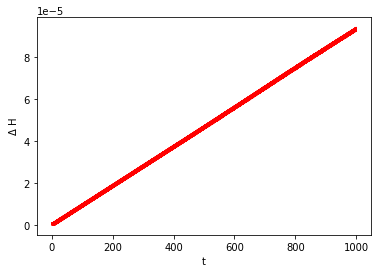

In [9]:
plt.plot(t, abs(H-h), '-r', lw=1)
plt.xlabel('t')
plt.ylabel('$\Delta$ H')
plt.xlim()
plt.ylim()
plt.savefig('h.png')

Видим, что наблюдается монотонный рост со временем. 
За 1000 временных единиц системы накопившаяся ошибка составила порядка e-4

Нарисуем полученное решение:

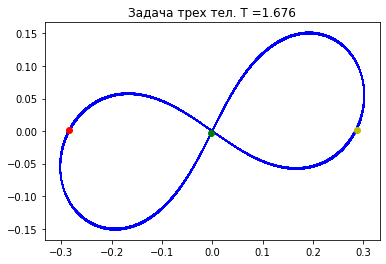

In [10]:
from matplotlib import pyplot as plt
from celluloid import Camera

fig = plt.figure()
camera = Camera(fig)

for i in range(0,1676*2,50):
    #plt.plot(label= 't='+str(round(t[i],2)))
    plt.plot(result[2, :], result[8, : ],'-b', lw=1)
    plt.plot(result[0, i], result[6, i ],'or', label='$m_1$')
    plt.plot(result[2, i], result[8, i ],'og', label='$m_2$')
    plt.plot(result[4, i], result[10, i],'oy', label='$m_3$')
    plt.title('Задача трех тел. T =' +str(Period))
    plt.grid()
    camera.snap()

animation = camera.animate()
animation.save('TB1.gif', writer='imagemagick',fps=10)




Анимируем его

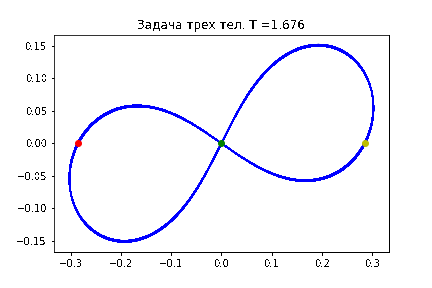

In [11]:
import os
os.rename('TB1.gif','TB1.png')
from IPython.display import Image
Image(filename="TB1.png")